## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [1]:
#1
import pandas as pd

# 读取CSV文件
file_path = 'github_bot_processed_data.csv'  # 请确保文件路径正确
data = pd.read_csv(file_path)

# 设置pandas的显示选项
# 显示所有列
pd.set_option('display.max_columns', None)

# 显示更多行
pd.set_option('display.max_rows', 100)  # 可以根据需要调整这个值

# 显示更宽的输出，避免换行
pd.set_option('display.width', None)

# 显示数据的前几行（默认前5行）
print(data.head())

# 如果想查看更多行，可以使用head()函数传入参数
print(data.head(20))  # 显示前20行

# 查看数据的基本信息
print(data.info())

# 查看数据的描述性统计
print(data.describe())

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

In [2]:
#2
import pandas as pd

# 读取CSV文件
file_path = 'github_bot_processed_data.csv'  # 请确保文件路径正确
data = pd.read_csv(file_path)

# 查看数据的前几行
print("数据的前5行：")
print(data.head())  # 默认显示前5行

# 如果想查看更多行，比如前10行
print("\n数据的前10行：")
print(data.head(10))

# 查看每列的数据类型和信息
print("\n数据的信息：")
data.info()

# 生成数据的描述性统计信息
print("\n数据的描述性统计信息：")
print(data.describe())

数据的前5行：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6 

In [3]:
#3
import pandas as pd

# 读取CSV文件
df = pd.read_csv('github_bot_processed_data.csv')

# 日期格式化
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

# 布尔值格式化为 Yes/No
bool_columns = ['type', 'site_admin', 'company', 'blog', 'location', 'hireable']
for col in bool_columns:
    # 处理可能的空字符串或NaN值，假设空字符串代表False
    df[col] = df[col].replace('', False).astype(bool)  # 如果数据中有字符串表示的布尔值，需要额外处理
    df[col + '_formatted'] = df[col].map({True: 'Yes', False: 'No'})

# 数值格式化
numeric_columns = ['public_repos', 'public_gists', 'followers', 'following', 'text_bot_count']
for col in numeric_columns:
    df[col + '_formatted'] = df[col].map('{:,}'.format)  # 添加千位分隔符

# 显示格式化后的DataFrame的部分列
formatted_columns = ['label', 'type_formatted', 'site_admin_formatted', 'public_repos_formatted', 
                     'public_gists_formatted', 'followers_formatted', 'following_formatted', 
                     'created_at', 'updated_at', 'text_bot_count_formatted']
print(df[formatted_columns])


       label type_formatted site_admin_formatted public_repos_formatted  \
0      Human            Yes                   No                     26   
1      Human            Yes                   No                     30   
2      Human            Yes                   No                    103   
3        Bot            Yes                   No                     49   
4      Human            Yes                   No                     11   
...      ...            ...                  ...                    ...   
19763    Bot            Yes                   No                     36   
19764  Human            Yes                   No                     16   
19765  Human            Yes                   No                     13   
19766  Human            Yes                   No                      7   
19767    Bot            Yes                   No                     10   

      public_gists_formatted followers_formatted following_formatted  \
0                          

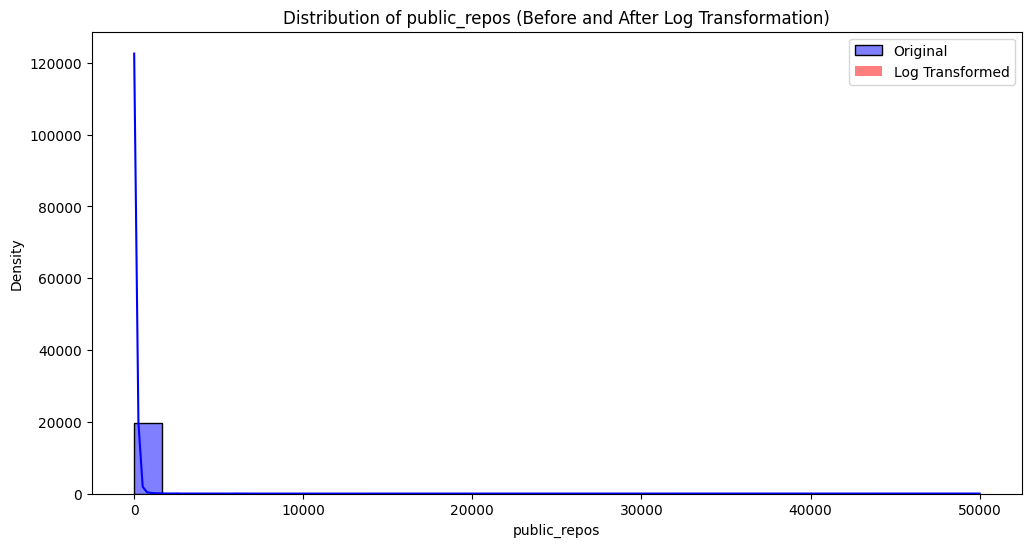

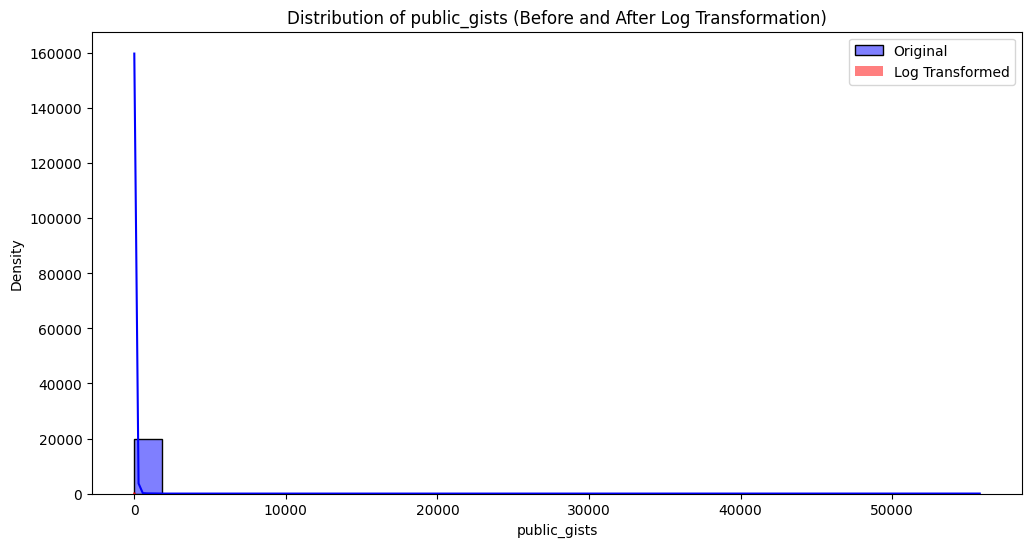

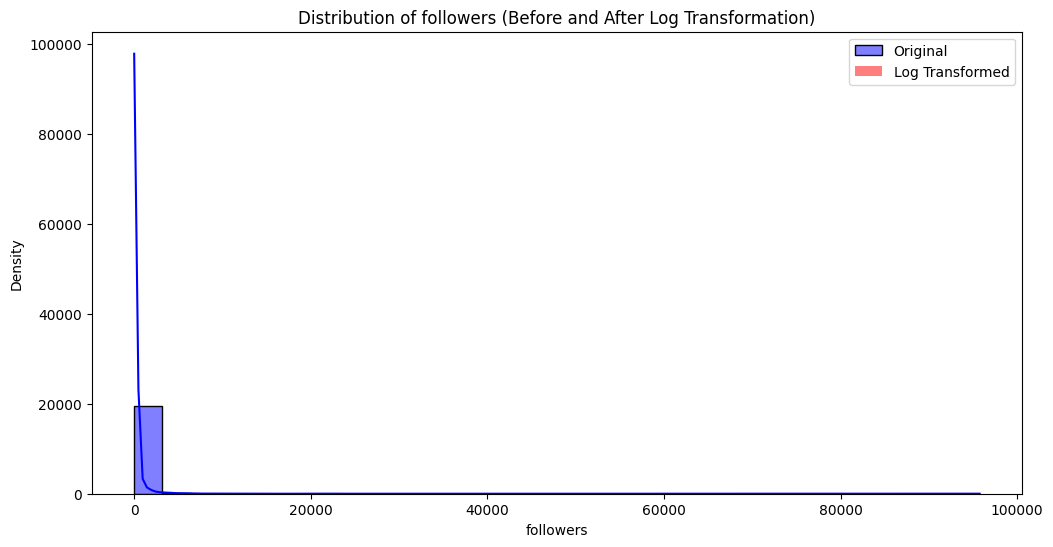

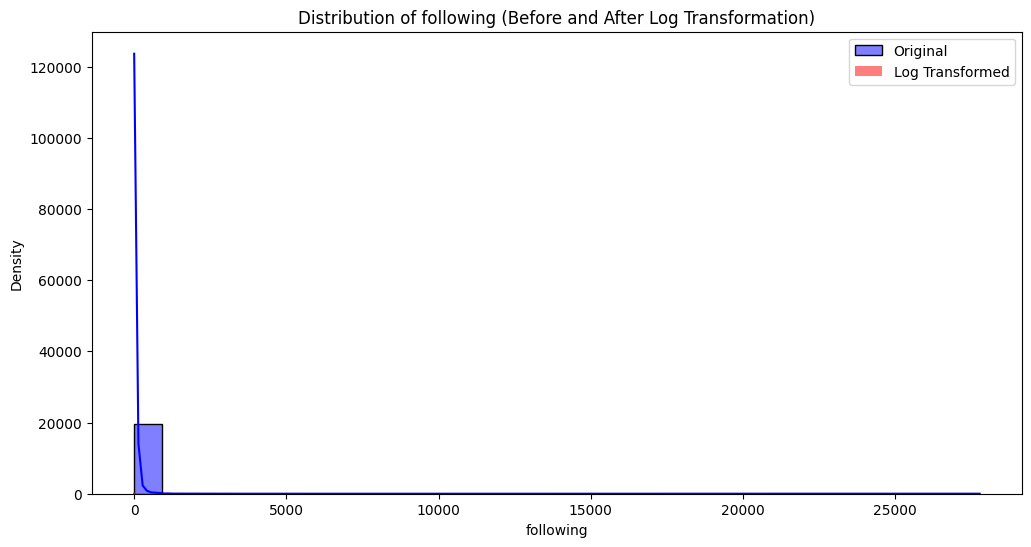

In [6]:
#4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
df = pd.read_csv('github_bot_processed_data.csv')

# 选择要进行对数变换的列
columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']

# 对数变换（使用log1p以避免对零取对数）
for col in columns_to_transform:
    df[f'{col}_log'] = np.log1p(df[col])  # log1p(x) = log(1 + x)

# 查看变换前后的分布
for col in columns_to_transform:
    plt.figure(figsize=(12, 6))
    
    # 原始数据分布
    sns.histplot(df[col], kde=True, bins=30, color='blue', label='Original')
    
    # 对数变换后数据分布
    sns.histplot(df[f'{col}_log'], kde=True, bins=30, color='red', label='Log Transformed', stat="density")
    
    plt.title(f'Distribution of {col} (Before and After Log Transformation)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    

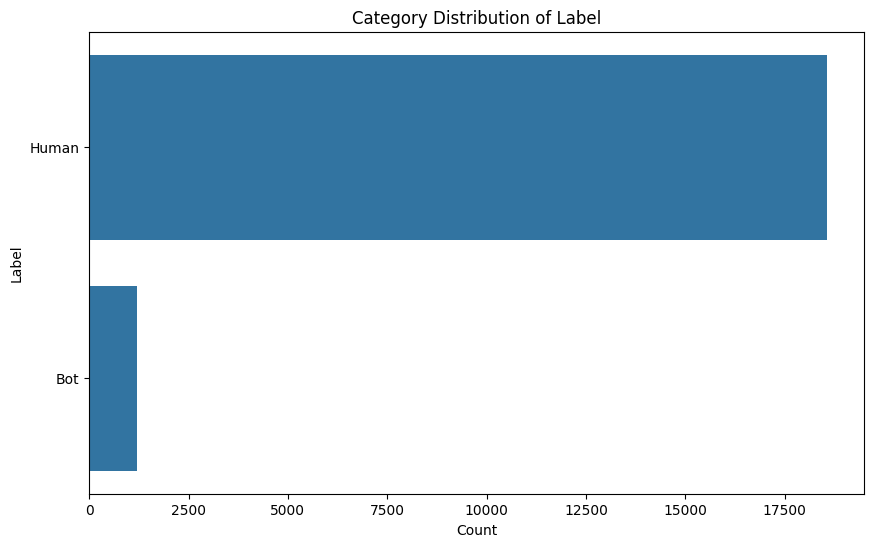

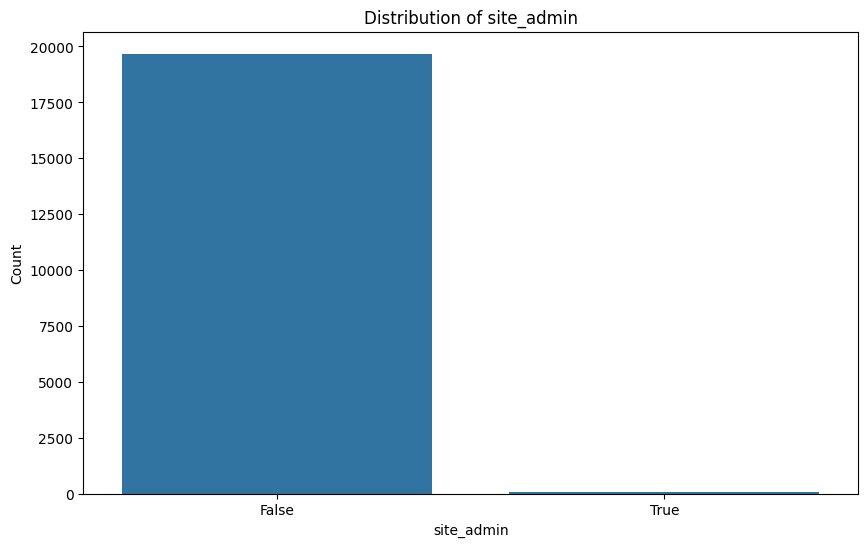

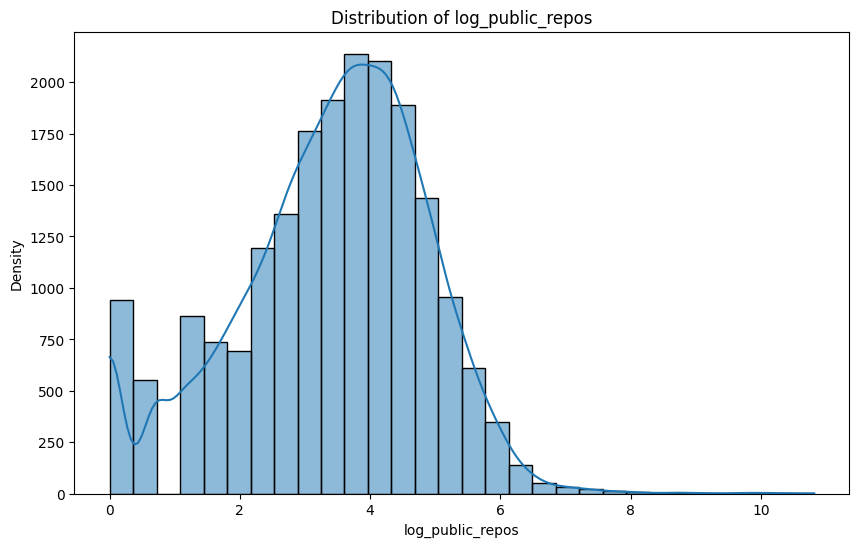

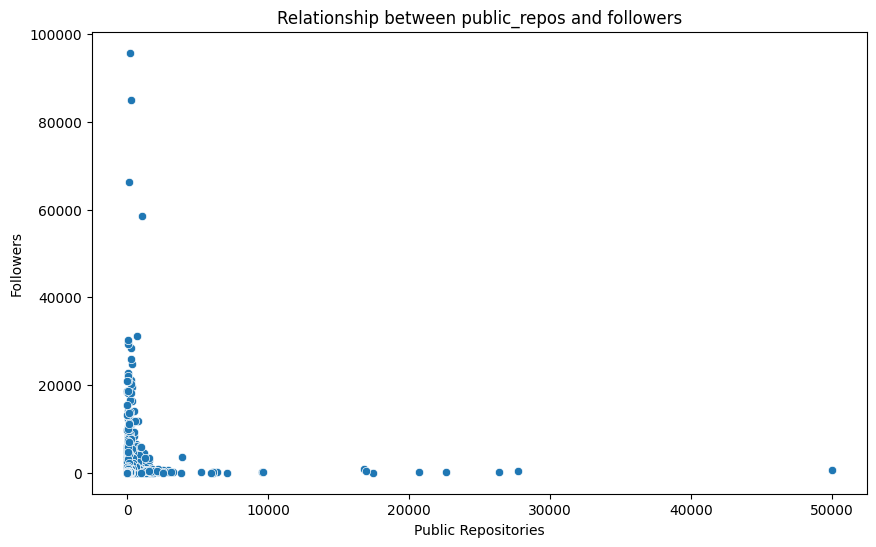

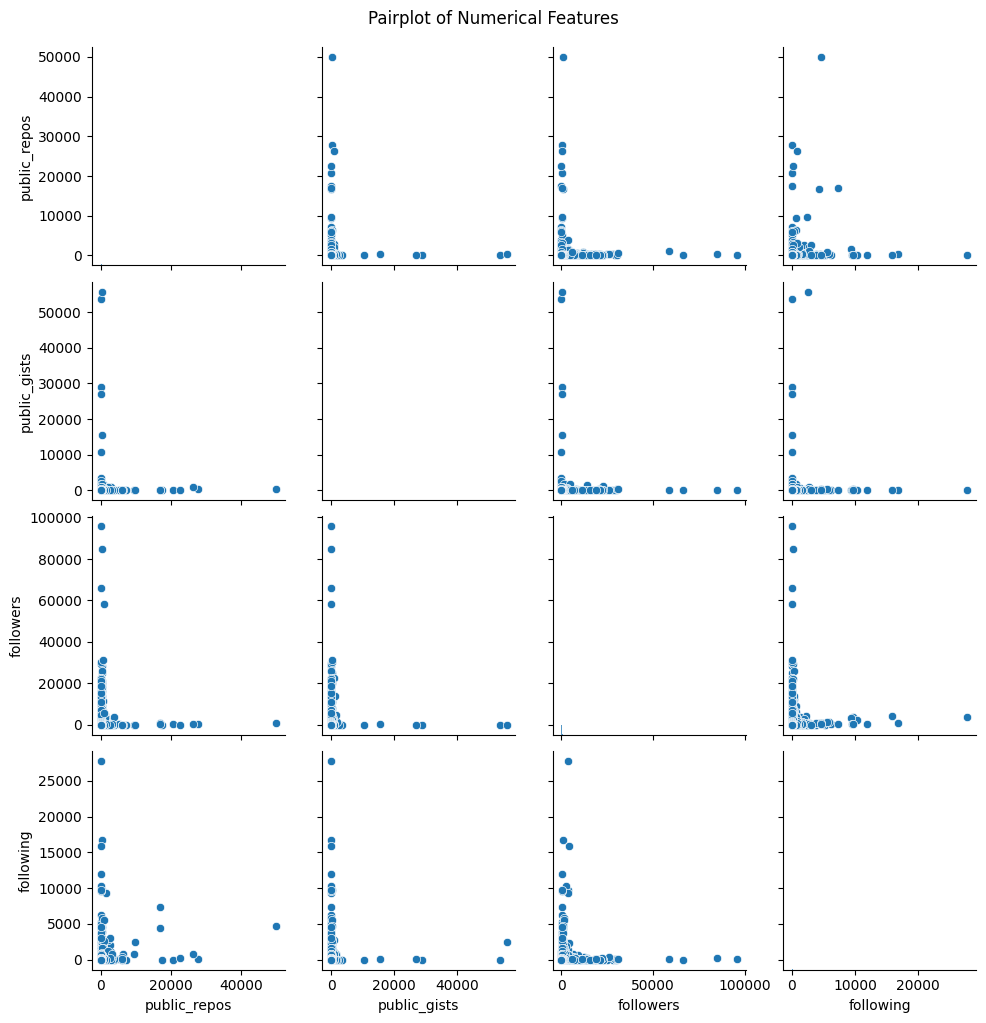

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 读取CSV文件到DataFrame
df = pd.read_csv('github_bot_processed_data.csv')

# 1. 条形图：展示label列的类别分布
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=df)
plt.title('Category Distribution of Label')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

# 2. 条形图：展示单个布尔特征的分布
boolean_features = ['site_admin']  # 假设只有一个布尔特征
if len(boolean_features) == 1:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=boolean_features[0], data=df)
    plt.title(f'Distribution of {boolean_features[0]}')
    plt.xlabel(boolean_features[0])
    plt.ylabel('Count')
    plt.show()
else:
    print("Multiple boolean features detected, consider creating a stacked bar chart if needed.")

# 3. 直方图：展示log_public_repos的对数变换后的数据分布
df['log_public_repos'] = df['public_repos'].apply(lambda x: np.log1p(x))  # 假设'public_repos'存在
plt.figure(figsize=(10, 6))
sns.histplot(df['log_public_repos'], kde=True, bins=30)
plt.title('Distribution of log_public_repos')
plt.xlabel('log_public_repos')
plt.ylabel('Density')
plt.show()

# 4. 散点图：展示public_repos与followers之间的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='public_repos', y='followers', data=df)
plt.title('Relationship between public_repos and followers')
plt.xlabel('Public Repositories')
plt.ylabel('Followers')
plt.show()

# 5. 散点矩阵：展示多个数值型特征之间的成对关系
numerical_features = ['public_repos', 'public_gists', 'followers', 'following']  # 根据实际数据调整
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

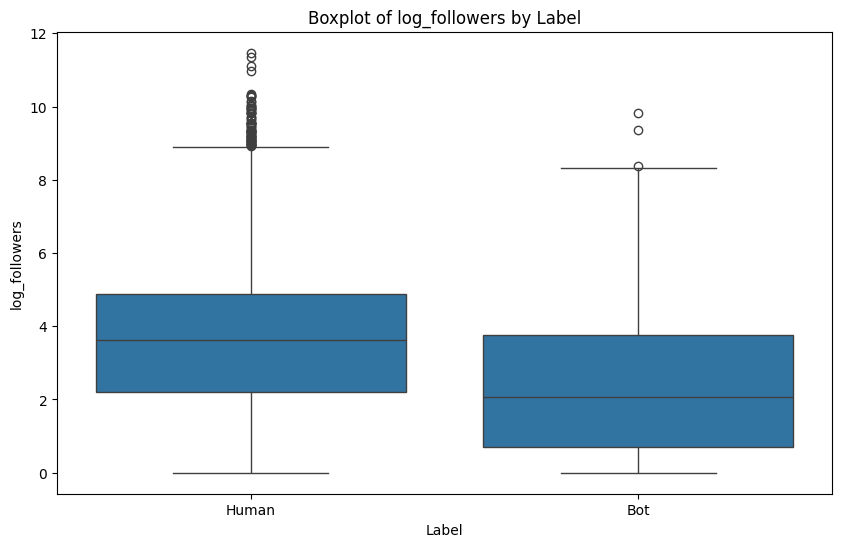

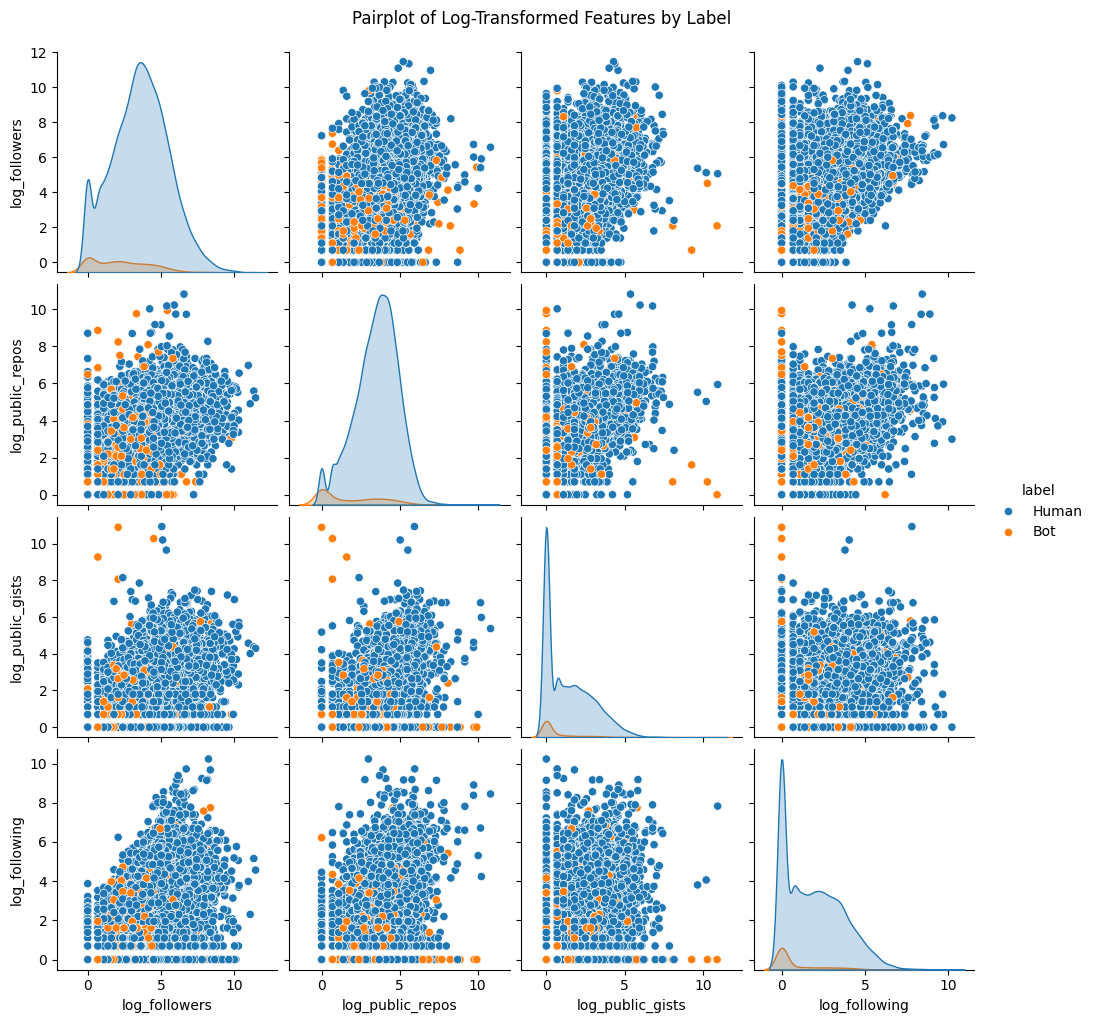

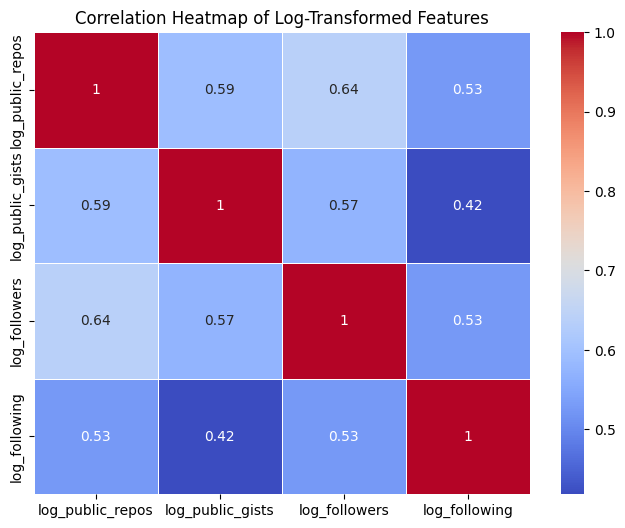

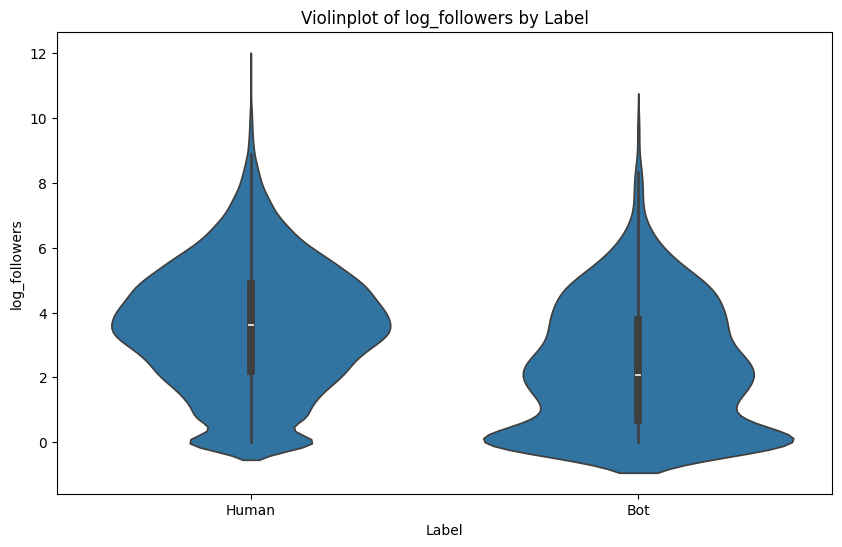

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('github_bot_processed_data.csv')

# 对数变换
df['log_followers'] = np.log1p(df['followers'])
df['log_public_repos'] = np.log1p(df['public_repos'])
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_following'] = np.log1p(df['following'])

# 1. 绘制箱线图：展示不同label类别下log_followers的分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=df)
plt.title('Boxplot of log_followers by Label')
plt.xlabel('Label')
plt.ylabel('log_followers')
plt.show()

# 2. 绘制成对图：展示不同特征之间的成对关系，并根据label分类
sns.pairplot(df[['log_followers', 'log_public_repos', 'log_public_gists', 'log_following', 'label']], hue='label')
plt.suptitle('Pairplot of Log-Transformed Features by Label', y=1.02)
plt.show()

# 3. 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性
correlation_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Log-Transformed Features')
plt.show()

# 4. 绘制小提琴图：展示label与log_followers之间的分布差异
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=df)
plt.title('Violinplot of log_followers by Label')
plt.xlabel('Label')
plt.ylabel('log_followers')
plt.show()

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB
None

Descriptive Statistics:
       public_repos  public_gists     

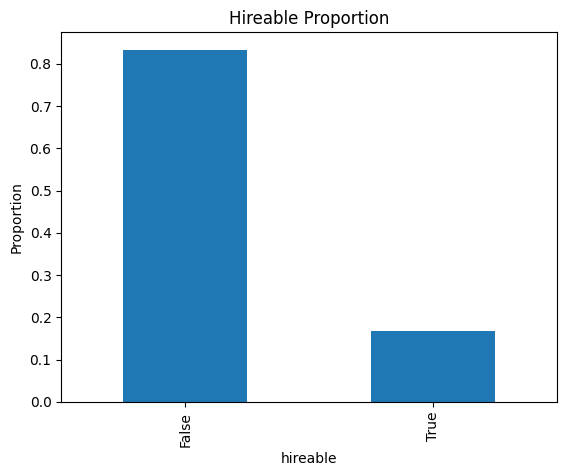

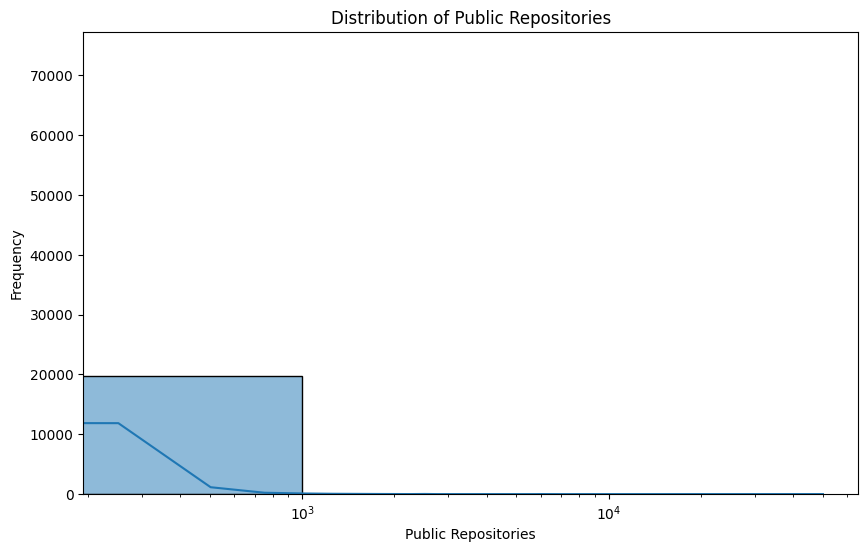

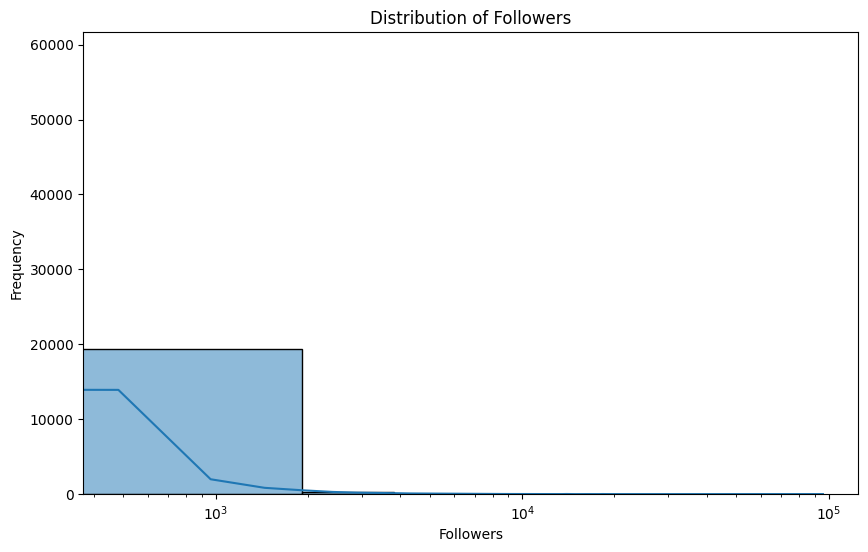


Top 10 Locations:
location
True     12691
False     7077
Name: count, dtype: int64


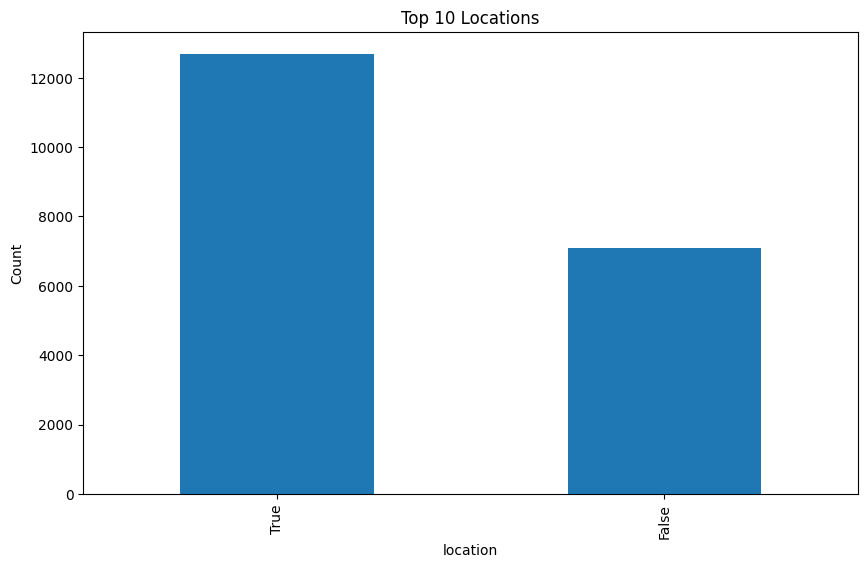


Top 10 Companies:
company
True     10794
False     8974
Name: count, dtype: int64


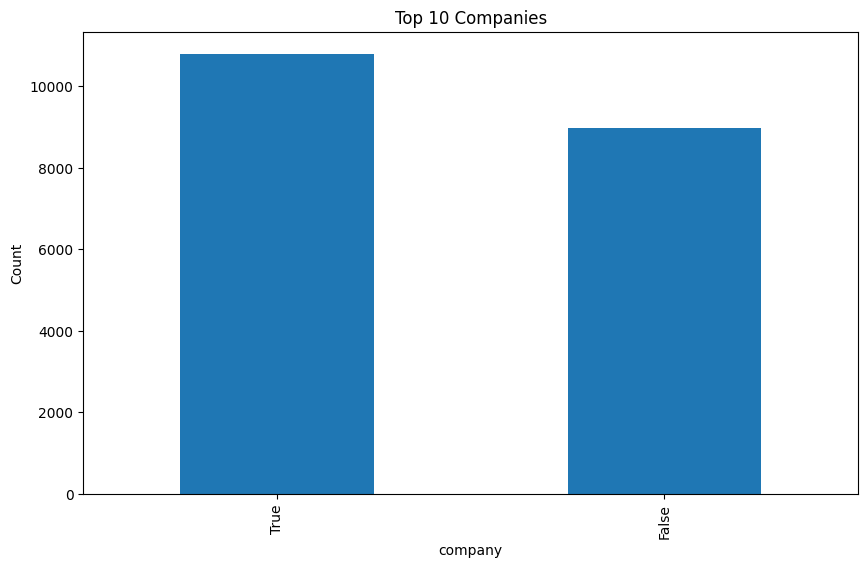

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 CSV 文件
df = pd.read_csv('github_bot_processed_data.csv')

# 基本信息
print("Dataframe Info:")
print(df.info())

# 描述性统计（仅针对数值型数据）
print("\nDescriptive Statistics:")
print(df.describe())

# 分析 hireable 列（假设是布尔型或分类数据）
hireable_counts = df['hireable'].value_counts(normalize=True)
print("\nHireable Proportion:")
print(hireable_counts)
hireable_counts.plot(kind='bar', title='Hireable Proportion')
plt.ylabel('Proportion')
plt.show()

# 公共仓库数量分布
plt.figure(figsize=(10, 6))
sns.histplot(df['public_repos'], kde=True, bins=50)
plt.title('Distribution of Public Repositories')
plt.xlabel('Public Repositories')
plt.ylabel('Frequency')
plt.xscale('log')  # 使用对数刻度以处理长尾分布
plt.show()

# 关注者数量分布
plt.figure(figsize=(10, 6))
sns.histplot(df['followers'], kde=True, bins=50)
plt.title('Distribution of Followers')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.xscale('log')  # 使用对数刻度以处理长尾分布
plt.show()

# 分析用户位置（前10个最常见的位置）
top_locations = df['location'].value_counts().head(10)
print("\nTop 10 Locations:")
print(top_locations)
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', title='Top 10 Locations')
plt.ylabel('Count')
plt.show()

# 分析公司（前10个最常见的公司）
top_companies = df['company'].value_counts().head(10)
print("\nTop 10 Companies:")
print(top_companies)
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', title='Top 10 Companies')
plt.ylabel('Count')
plt.show()